# Test Full Condition

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv("/Users/trancatkhanh/Downloads/Monitor PNL/pnl_old_logs/ETH_2025-11-05.csv")

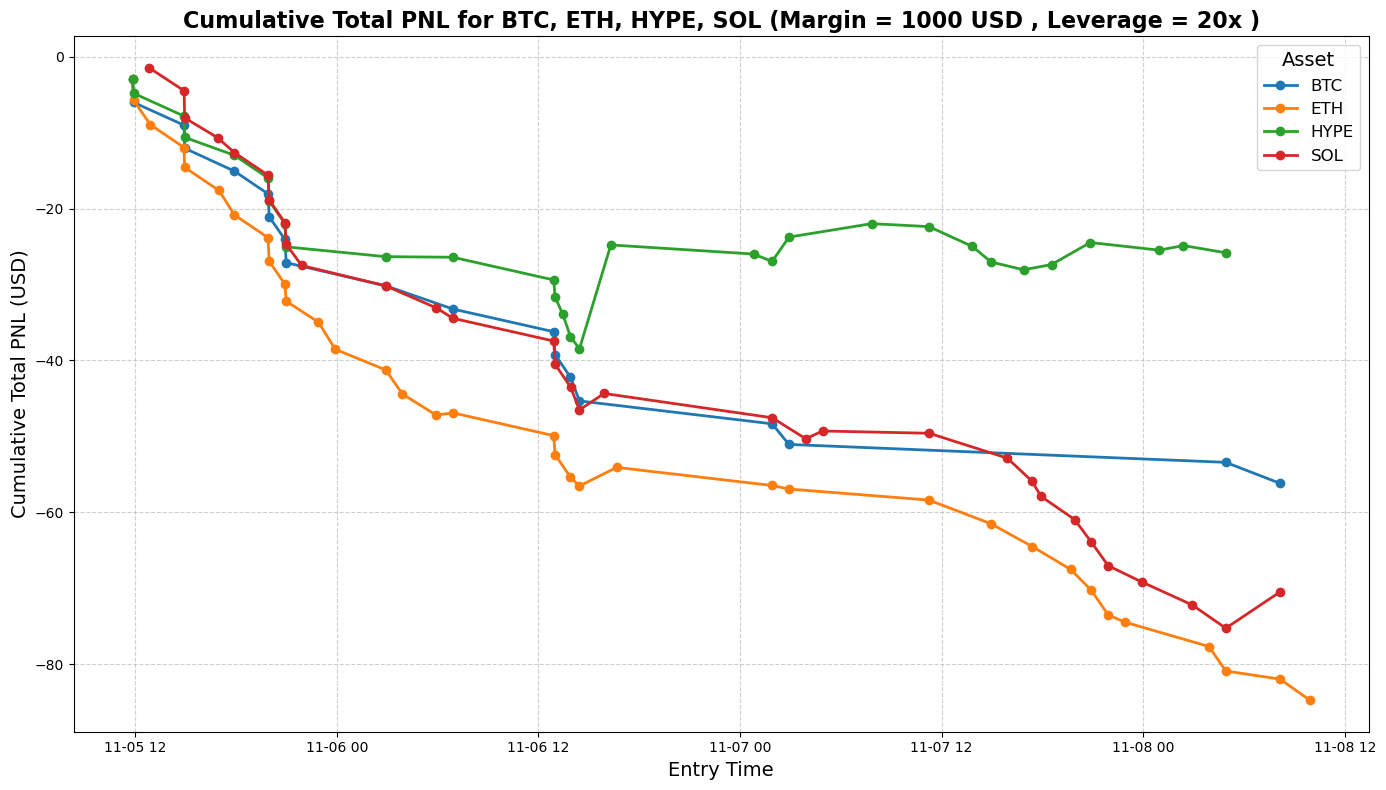

In [ ]:
import matplotlib.pyplot as plt

assets = ["BTC", "ETH", "HYPE", "SOL"]
csv_dir = "/Users/trancatkhanh/Downloads/Monitor PNL/pnl_old_logs"
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Assign a distinct color to each asset

plt.figure(figsize=(14, 8))

for asset, color in zip(assets, colors):
    import glob
    files = glob.glob(f"{csv_dir}/{asset}_*.csv")
    if not files:
        print(f"No CSV file found for {asset}")
        continue
    csv_file = files[0]
    df = pd.read_csv(csv_file)
    if "entry_time" not in df or "total_pnl_usd" not in df:
        print(f"Required columns missing in {csv_file}")
        continue
    df['entry_time'] = pd.to_datetime(df['entry_time'])
    #  'trading_fee' calculated as 0.00015 * leverage * position_size for each row.
    df['trading_fee'] = 0.00015 * 20000 
    # Subtract the trading fee from the total PNL per order, and recalculate cumulative PNL
    df['total_pnl_usd_minus_fee'] = df['total_pnl_usd'] - df['trading_fee']
    df['cumulative_pnl_usd_minus_fee'] = df['total_pnl_usd_minus_fee'].cumsum()
    plt.plot(df['entry_time'], df['cumulative_pnl_usd_minus_fee'],
             marker='o', linestyle='-', label=asset, color=color, linewidth=2, markersize=6)

plt.xlabel("Entry Time", fontsize=14)
plt.ylabel("Cumulative Total PNL (USD)", fontsize=14)
plt.title("Cumulative Total PNL for BTC, ETH, HYPE, SOL (Margin = 1000 USD , Leverage = 20x )", fontsize=16, fontweight="bold")
plt.legend(title="Asset", fontsize=12, title_fontsize=14, loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Test version 2 (Only Liquidation)

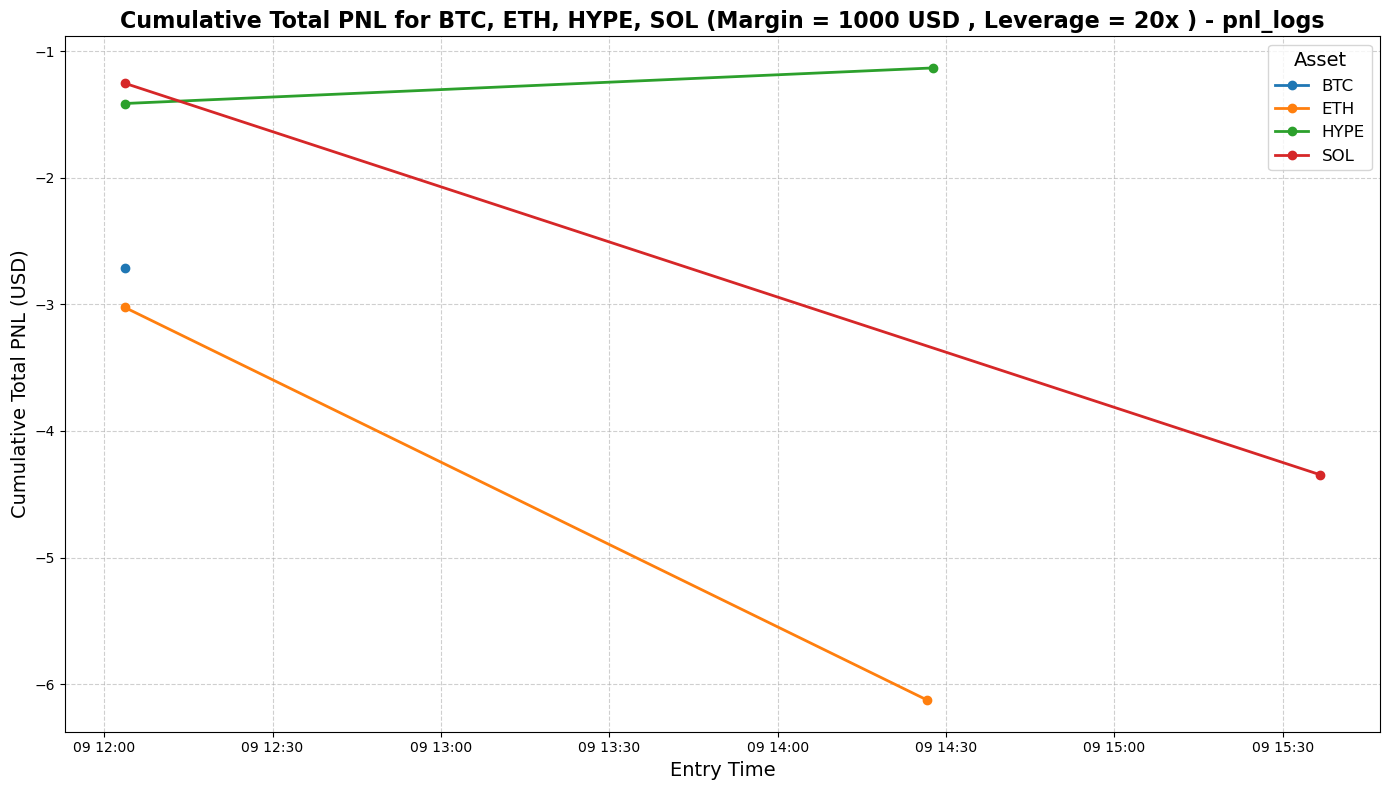

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

assets = ["BTC", "ETH", "HYPE", "SOL"]
csv_dir = "/Users/trancatkhanh/Downloads/Monitor PNL/pnl_logs"
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Assign a distinct color to each asset

plt.figure(figsize=(14, 8))

for asset, color in zip(assets, colors):
    files = glob.glob(f"{csv_dir}/{asset}_*.csv")
    if not files:
        print(f"No CSV file found for {asset} in pnl_logs")
        continue
    # Pick the CSV with latest date/session, if multiple found
    csv_file = sorted(files)[-1]
    df = pd.read_csv(csv_file)
    if "entry_time" not in df or "total_pnl_usd" not in df:
        print(f"Required columns missing in {csv_file}")
        continue
    df['entry_time'] = pd.to_datetime(df['entry_time'])
    # 'trading_fee' calculated as 0.00015 * leverage * position_size for each row.
    df['trading_fee'] = 0.00015 * 20000 
    # Subtract the trading fee from the total PNL per order, and recalculate cumulative PNL
    df['total_pnl_usd_minus_fee'] = df['total_pnl_usd'] - df['trading_fee']
    df['cumulative_pnl_usd_minus_fee'] = df['total_pnl_usd_minus_fee'].cumsum()
    plt.plot(df['entry_time'], df['cumulative_pnl_usd_minus_fee'],
             marker='o', linestyle='-', label=asset, color=color, linewidth=2, markersize=6)

plt.xlabel("Entry Time", fontsize=14)
plt.ylabel("Cumulative Total PNL (USD)", fontsize=14)
plt.title("Cumulative Total PNL for BTC, ETH, HYPE, SOL (Margin = 1000 USD , Leverage = 20x ) - pnl_logs", fontsize=16, fontweight="bold")
plt.legend(title="Asset", fontsize=12, title_fontsize=14, loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Test version 3 (Liquidation + Receiver Change )

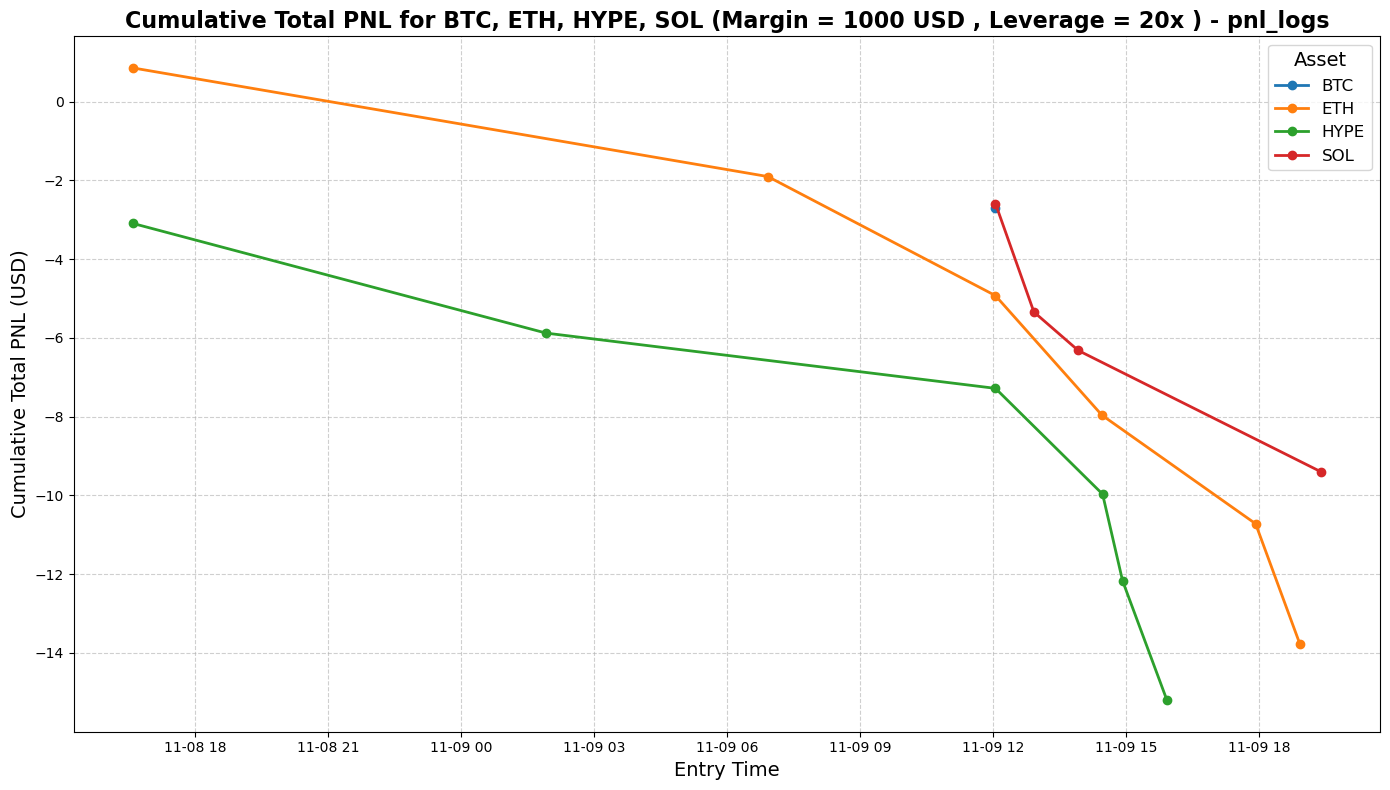

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

assets = ["BTC", "ETH", "HYPE", "SOL"]
csv_dir = "/Users/trancatkhanh/Downloads/Monitor PNL/pnl_logs_v2"
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Assign a distinct color to each asset

plt.figure(figsize=(14, 8))

for asset, color in zip(assets, colors):
    files = glob.glob(f"{csv_dir}/{asset}_*.csv")
    if not files:
        print(f"No CSV file found for {asset} in pnl_logs")
        continue
    # Pick the CSV with latest date/session, if multiple found
    csv_file = sorted(files)[-1]
    df = pd.read_csv(csv_file)
    if "entry_time" not in df or "total_pnl_usd" not in df:
        print(f"Required columns missing in {csv_file}")
        continue
    df['entry_time'] = pd.to_datetime(df['entry_time'])
    #  'trading_fee' calculated as 0.00015 * leverage * position_size for each row.
    df['trading_fee'] = 0.00015 * 20000 
    # Subtract the trading fee from the total PNL per order, and recalculate cumulative PNL
    df['total_pnl_usd_minus_fee'] = df['total_pnl_usd'] - df['trading_fee']
    df['cumulative_pnl_usd_minus_fee'] = df['total_pnl_usd_minus_fee'].cumsum()
    plt.plot(df['entry_time'], df['cumulative_pnl_usd_minus_fee'],
             marker='o', linestyle='-', label=asset, color=color, linewidth=2, markersize=6)

plt.xlabel("Entry Time", fontsize=14)
plt.ylabel("Cumulative Total PNL (USD)", fontsize=14)
plt.title("Cumulative Total PNL for BTC, ETH, HYPE, SOL (Margin = 1000 USD , Leverage = 20x ) - pnl_logs", fontsize=16, fontweight="bold")
plt.legend(title="Asset", fontsize=12, title_fontsize=14, loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

